# Learning and Practicing Pandas and Data Science.

#### Steps on How to Approach a New Data Set.

1. Data Quality:
   1. Look at the data - `df.head(5)`
   1. Data dimension - `df.shape`
   1. Data columns - `df.columns`
   1. Data columns types - `df.dtypes`
   1. Data 
   1. Missing data by columns. Amount and precent. 
2. Subsetting the data:
   1. Choose only the numeric features `df.`
   1. Choose only the string/categorical features `df.`
   1. Choose only the boolean features.
2. Exploring Features:
   1. `df.corr()`
   1. `df.hist()`
3. Stats and Counts of variables levels
   1. Count of values/levels:    
   `df['<column>'].value_counts().sort_values(ascending=False)`
   1. Stats by levels/values:     
   ```
   (
    df.groupby(columns = ['<grouping_column1>', ...])['<numeric_column>'] \
      .agg(Count='count', Mean='mean', Max='max', Sum='sum') \
      .sort_values(by=['<aggregated_stats_column>', ...], ascending = False)
   )
   ```
   Need to add `Median='median'` in the `.agg()`. Do not have that function by default. Could do something like: `Median='np.median'` or something.
3. Fill Missing Data:

#### Steps on How to obtain insights from a Data Set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import datetime as dt
import seaborn as sns


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.option_context('display.float_format', lambda x: f'{x:,.3f}')

In [4]:
pd.__version__

'1.4.2'

In [5]:
dfAMLRaw = pd.read_csv("SAML-D.csv/SAML-D.csv")


In [6]:
df = pd.read_csv('df.csv')

In [7]:
dfAMLRaw.shape

(9504852, 12)

In [8]:
df.shape

(9504852, 15)

In [7]:
dfAMLRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [9]:
dfAMLRaw.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


In [11]:
dfAMLRaw.describe()

,Sender_account,Receiver_account,Amount,Is_laundering
count,9504852.000,9504852.000,9504852.000,9504852.000
mean,5006619409.969,5006006469.648,8762.968,0.001
std,2885813892.132,2884762983.270,25614.953,0.032
min,9018.000,9018.000,3.730,0.000
25%,2513133245.000,2513219464.000,2143.688,0.000
50%,5001016667.000,5002572491.500,6113.720,0.000
75%,7505051146.000,7502397427.000,10458.462,0.000
max,9999986843.000,9999971095.000,12618498.400,1.000


In [30]:
dfAMLRaw.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

In [32]:
dfAMLRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB


In [29]:
dfAMLRaw.dtypes.value_counts()

object     8
int64      3
float64    1
dtype: int64

In [125]:
dfAMLRaw.head()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits


<AxesSubplot:>

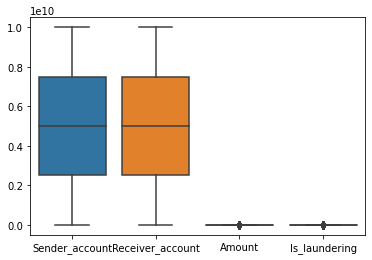

In [12]:
import seaborn as sns
sns.boxplot(data = dfAMLRaw)

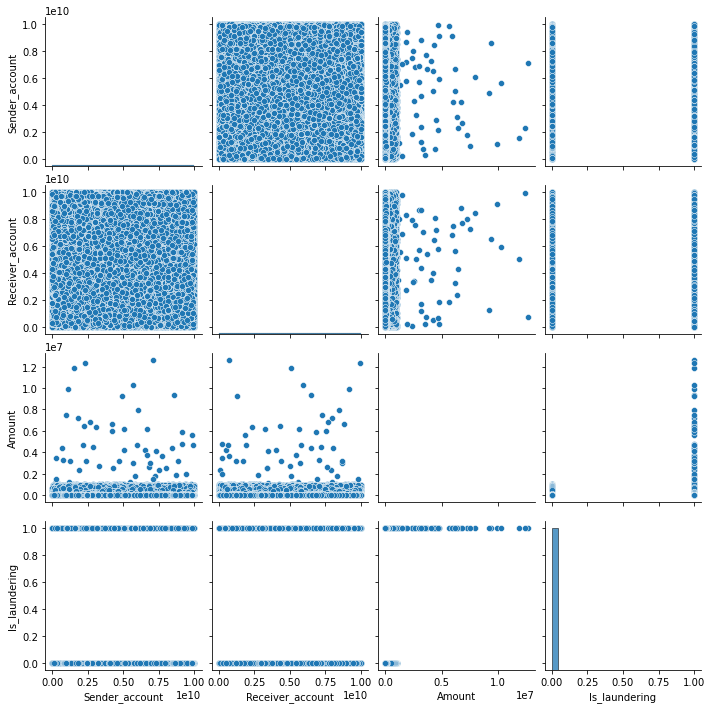

In [13]:
sns.pairplot(dfAMLRaw)

<AxesSubplot:>

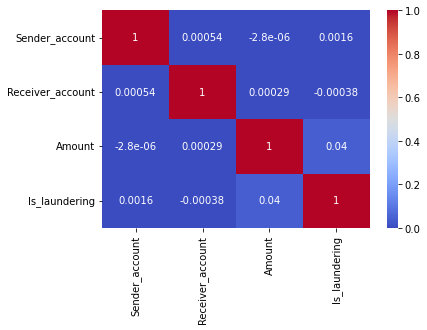

In [15]:
dfAMLRaw.corr()
sns.heatmap(dfAMLRaw.corr(), annot=True, cmap="coolwarm")

array([[<AxesSubplot:title={'center':'Sender_account'}>,
        <AxesSubplot:title={'center':'Receiver_account'}>],
       [<AxesSubplot:title={'center':'Amount'}>,
        <AxesSubplot:title={'center':'Is_laundering'}>]], dtype=object)

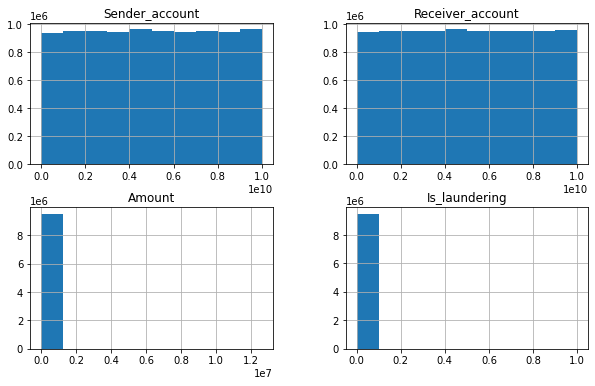

In [34]:
dfAMLRaw.hist(figsize=(10, 6))

In [35]:
dfAMLRaw['Sender_bank_location'].value_counts(normalize=True)

UK            0.966
Turkey        0.002
Switzerland   0.002
Pakistan      0.002
UAE           0.002
Nigeria       0.002
Spain         0.002
Germany       0.002
USA           0.002
Italy         0.002
France        0.002
Japan         0.002
Morocco       0.002
Austria       0.002
Mexico        0.002
Albania       0.002
India         0.002
Netherlands   0.002
Name: Sender_bank_location, dtype: float64

In [36]:
dfAMLRaw.isnull()

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,False,False,False,False,False,False,False,False,False,False,False,False
9504848,False,False,False,False,False,False,False,False,False,False,False,False
9504849,False,False,False,False,False,False,False,False,False,False,False,False
9504850,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
dfAMLRaw.isnull().sum()

Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

In [38]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [6]:
dfRawIris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
dfRawIris.shape

(150, 5)

In [10]:
dfRawIris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
dfRawIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [122]:
dfAMLRaw

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.250,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.180,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.140,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.700,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [16]:
df = dfAMLRaw.copy()

In [17]:
df

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.250,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.180,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.140,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.700,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [22]:
df['Sender_bank_location'].value_counts()

UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Albania          17648
India            17596
Netherlands      16770
Name: Sender_bank_location, dtype: int64

In [ ]:
df.query('Is_laundering == 1').groupby('Sender_bank_location')['Amount'].agg(Count = 'count', Mean = 'mean', Sum = 'sum').sort_values('Count', ascending = False)

,Count,Mean,Sum
Sender_bank_location,,,
UK,9183088,8701.133,79903272728.352
Turkey,20902,10067.732,210435725.831
Switzerland,20503,11037.701,226305975.210
Pakistan,20346,10402.538,211650040.692
UAE,20081,10101.358,202845370.997
Nigeria,20027,11124.877,222797915.835
Spain,19391,10882.093,211014670.223
Germany,19259,10864.295,209235453.599
USA,19027,10674.803,203109471.018


In [ ]:
df['Year-Month'] = df.Date.str.split('-', expand=True)[0] + '-' + df.Date.str.split('-', expand=True)[1]

In [38]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type', 'Year-Month'],
      dtype='object')

In [123]:
df.Receiver_bank_location.value_counts()

UK             8864634
Pakistan         38980
Austria          38844
Albania          38783
Japan            38729
Morocco          38704
Germany          38540
France           38512
Mexico           38385
Nigeria          38272
Netherlands      37314
Spain            37288
India            36936
USA              36850
Italy            36517
Switzerland      36081
UAE              35897
Turkey           35586
Name: Receiver_bank_location, dtype: int64

In [39]:
df.Receiver_bank_location.value_counts(normalize=True)

UK            0.933
Pakistan      0.004
Austria       0.004
Albania       0.004
Japan         0.004
Morocco       0.004
Germany       0.004
France        0.004
Mexico        0.004
Nigeria       0.004
Netherlands   0.004
Spain         0.004
India         0.004
USA           0.004
Italy         0.004
Switzerland   0.004
UAE           0.004
Turkey        0.004
Name: Receiver_bank_location, dtype: float64

In [20]:
df

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.15,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.64,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.44,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.00,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.25,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.25,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.18,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.14,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.70,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [21]:
sum(df.Is_laundering)

9873

In [36]:
sum(df.Is_laundering)/len(df.Is_laundering)

0.0010387326388669703

In [35]:
df.Sender_bank_location.value_counts()

UK             9183088
Turkey           20902
Switzerland      20503
Pakistan         20346
UAE              20081
Nigeria          20027
Spain            19391
Germany          19259
USA              19027
Italy            18895
France           18702
Japan            18468
Morocco          18437
Austria          18050
Mexico           17662
Albania          17648
India            17596
Netherlands      16770
Name: Sender_bank_location, dtype: int64

In [9]:
df.Sender_bank_location.value_counts(normalize=True)

UK            0.966
Turkey        0.002
Switzerland   0.002
Pakistan      0.002
UAE           0.002
Nigeria       0.002
Spain         0.002
Germany       0.002
USA           0.002
Italy         0.002
France        0.002
Japan         0.002
Morocco       0.002
Austria       0.002
Mexico        0.002
Albania       0.002
India         0.002
Netherlands   0.002
Name: Sender_bank_location, dtype: float64

In [28]:
df.query('Is_laundering == 1').groupby(by=['Sender_bank_location'])['Amount'].mean().sort_values(ascending=False)

Sender_bank_location
Nigeria       266176.159
Switzerland   101059.602
Italy          83150.662
Morocco        52640.186
Austria        41230.576
UK             40687.100
Spain          20427.439
France         17284.276
Turkey         17038.190
UAE            15047.090
Pakistan       13007.122
USA            12061.475
Japan          11859.664
Albania        11391.976
Netherlands    10470.400
Mexico         10221.700
India           9928.765
Germany         8340.345
Name: Amount, dtype: float64

In [11]:
df.query('Is_laundering == 1 & Sender_bank_location == "Nigeria"').groupby(by=['Sender_bank_location', 'Receiver_bank_location'])['Amount'].agg(Count = 'count', Mean = 'mean', Sum = 'sum').sort_values(by=["Mean"], ascending=False)

Count       Mean         Sum
Sender_bank_location Receiver_bank_location                              
Nigeria              UK                         22 301364.298 6630014.559
                     USA                         1  13614.616   13614.616
                     Albania                     1   6208.510    6208.510
                     Turkey                      1   4566.280    4566.280

In [14]:
df.query('Is_laundering == 1 & Sender_bank_location == "UK"').groupby(by=['Sender_bank_location', 'Receiver_bank_location'])['Amount'].agg(Count = 'count', Mean = 'mean', Max = 'max', Sum = 'sum').sort_values(by=["Max"], ascending=False)

Count       Mean          Max  \
Sender_bank_location Receiver_bank_location                                  
UK                   UK                       6817  50287.137 12618498.400   
                     Switzerland                71 103826.437  6812158.180   
                     Nigeria                   236  20976.319  2515980.780   
                     Italy                     120  17394.089  1249908.060   
                     Pakistan                  160  11535.101   549209.300   
                     Turkey                    173  14349.148   502205.670   
                     Albania                   213  11572.061   439119.480   
                     Netherlands               141   9022.386   433314.600   
                     Japan                      76  11354.830   357938.100   
                     Morocco                   245   9224.598   322244.450   
                     Austria                   152  12499.933   315033.800   
                     UAE                       192   6084.473   155695.310   
                     France                     75  10105.067   134974.740   
                     Mexico                    195   7117.438   130001.440   
                     Germany                    97   7518.255   125153.900   
                     USA                        81   7658.894    82951.690   
                     Spain                      80   9584.915    75742.166   
                     India                     129   5755.799    71786.629   

                                                      Sum  
Sender_bank_location Receiver_bank_location                
UK                   UK                     342807414.404  
                     Switzerland              7371676.999  
                     Nigeria                  4950411.209  
                     Italy                    2087290.643  
                     Pakistan                 1845616.143  
                     Turkey                   2482402.607  
                     Albania                  2464849.055  
                     Netherlands              1272156.422  
                     Japan                     862967.051  
                     Morocco                  2260026.491  
                     Austria                  1899989.816  
                     UAE                      1168218.775  
                     France                    757880.040  
                     Mexico                   1387900.313  
                     Germany                   729270.739  
                     USA                       620370.436  
                     Spain                     766793.169  
                     India                     742498.021

In [21]:
df.query('Is_laundering == 1 & Receiver_bank_location == "UK"').groupby(by=['Receiver_bank_location', 'Sender_bank_location'])['Amount'].agg(Count = 'count', Mean = 'mean', Max = 'max', Sum = 'sum').sort_values(by=["Sum"], ascending=False)

Count       Mean          Max  \
Receiver_bank_location Sender_bank_location                                  
UK                     UK                     6817  50287.137 12618498.400   
                       Nigeria                  22 301364.298  6475296.650   
                       Switzerland              31 128197.839  3633963.350   
                       Italy                    35  99150.843  3185420.970   
                       Morocco                  45  62440.405   804708.760   
                       Austria                  34  36832.966   248265.360   
                       Spain                    23  22761.968    90198.996   
                       Turkey                   23  18712.803   104896.341   
                       UAE                      24  17290.606    58165.912   
                       Japan                    31  12332.522    66876.854   
                       USA                      32  11668.974    47230.697   
                       Mexico                   33  11041.101    60370.101   
                       Netherlands              32  10975.243    64589.377   
                       Germany                  35   8522.875    33976.244   
                       Albania                  23  12134.465    38276.286   
                       India                    30   8638.893    67635.420   
                       Pakistan                 20  12612.408    43702.939   
                       France                   18   7988.026    19084.356   

                                                      Sum  
Receiver_bank_location Sender_bank_location                
UK                     UK                   342807414.404  
                       Nigeria                6630014.559  
                       Switzerland            3974133.023  
                       Italy                  3470279.511  
                       Morocco                2809818.211  
                       Austria                1252320.839  
                       Spain                   523525.272  
                       Turkey                  430394.458  
                       UAE                     414974.547  
                       Japan                   382308.191  
                       USA                     373407.162  
                       Mexico                  364356.349  
                       Netherlands             351207.773  
                       Germany                 298300.609  
                       Albania                 279092.706  
                       India                   259166.779  
                       Pakistan                252248.156  
                       France                  143784.473

In [39]:
df.query('Is_laundering == 1').groupby(by=['Receiver_bank_location'])['Amount'].mean().sort_values(ascending=False)

Receiver_bank_location
Switzerland   101173.996
UK             49947.557
Nigeria        20118.549
Italy          17251.568
Turkey         14137.907
Austria        12411.653
Japan          12088.676
France         11845.887
Pakistan       11639.527
Albania        11105.248
Spain          10449.218
Morocco         9210.457
Netherlands     8820.999
USA             8779.195
Mexico          7542.060
Germany         7426.680
India           6305.918
UAE             6276.903
Name: Amount, dtype: float64

In [40]:
df.query('Is_laundering == 1').groupby(by=['Receiver_bank_location'])['Amount'].count().sort_values(ascending=False)

Receiver_bank_location
UK             7308
Morocco         253
Nigeria         251
Albania         235
Mexico          197
UAE             195
Turkey          177
Pakistan        169
Austria         154
Netherlands     148
India           137
Italy           131
Germany         102
Spain            87
USA              87
Japan            83
France           82
Switzerland      77
Name: Amount, dtype: int64

In [41]:
df.query('Is_laundering == 1').Sender_bank_location.value_counts()

UK             9253
Morocco          55
Italy            45
Mexico           44
Germany          43
India            42
Netherlands      41
Switzerland      41
Japan            38
Austria          38
USA              36
UAE              34
France           31
Albania          28
Turkey           27
Spain            27
Nigeria          25
Pakistan         25
Name: Sender_bank_location, dtype: int64

In [42]:
df.query('Is_laundering == 1').Receiver_bank_location.value_counts()

UK             7308
Morocco         253
Nigeria         251
Albania         235
Mexico          197
UAE             195
Turkey          177
Pakistan        169
Austria         154
Netherlands     148
India           137
Italy           131
Germany         102
USA              87
Spain            87
Japan            83
France           82
Switzerland      77
Name: Receiver_bank_location, dtype: int64

In [ ]:
df.query('Is_laundering == 1').groupby(by=['Date'])['Amount'].agg(Count = 'count', Mean = 'mean', Sum = 'sum')

,Count,Mean,Sum
Date,,,
2022-10-07,27,6699.627,180889.924
2022-10-08,29,98149.808,2846344.426
2022-10-09,32,8548.490,273551.687
2022-10-10,32,15453.332,494506.626
2022-10-11,30,7503.788,225113.653
...,...,...,...
2023-08-19,29,5341.133,154892.850
2023-08-20,36,262965.894,9466772.190
2023-08-21,48,8640.947,414765.466


In [50]:
df.query('Is_laundering == 1').groupby(by=['Date'])['Amount'].agg(Count = 'count', Mean = 'mean', Sum = 'sum')['Sum']

Date
2022-10-07    180889.924
2022-10-08   2846344.426
2022-10-09    273551.687
2022-10-10    494506.626
2022-10-11    225113.653
                 ...    
2023-08-19    154892.850
2023-08-20   9466772.190
2023-08-21    414765.466
2023-08-22    486957.466
2023-08-23     81980.263
Name: Sum, Length: 321, dtype: float64

<AxesSubplot:xlabel='Date'>

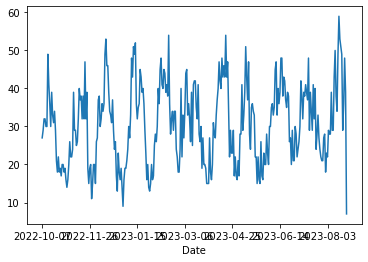

In [52]:
df.query('Is_laundering == 1').groupby(by=['Date'])['Amount'].agg(Count = 'count', Mean = 'mean', Sum = 'sum').Count.plot()

<AxesSubplot:xlabel='Date'>

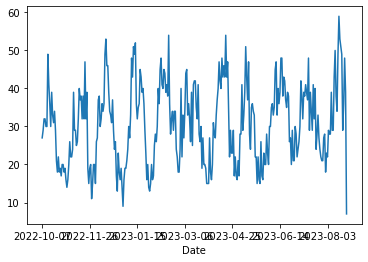

In [54]:
df.query('Is_laundering == 1').groupby(by=['Date'])['Amount'].count().plot()

<AxesSubplot:xlabel='Date'>

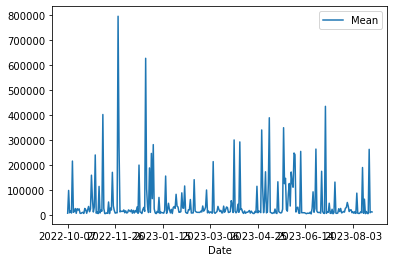

In [62]:
df.query('Is_laundering == 1').groupby(by=['Date'])['Amount'].agg(Mean = 'mean').plot()

<AxesSubplot:xlabel='Date'>

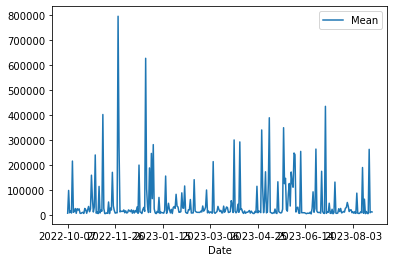

In [63]:
df.query('Is_laundering == 1').groupby(by=['Date']).Amount.agg(Mean = 'mean').plot()

<AxesSubplot:xlabel='Date'>

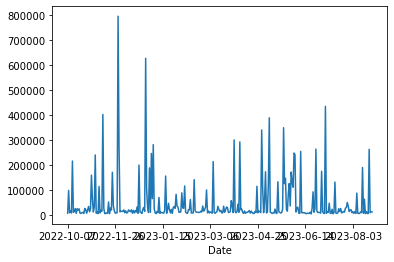

In [64]:
df.query('Is_laundering == 1').groupby(by=['Date']).Amount.mean().plot()

<AxesSubplot:xlabel='Sender_bank_location'>

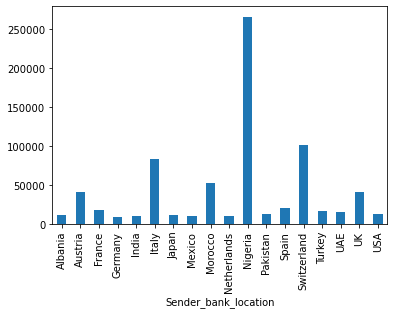

In [41]:
df.query('Is_laundering == 1').groupby(by=['Sender_bank_location']).Amount.mean().plot(kind='bar')

<AxesSubplot:xlabel='Sender_bank_location'>

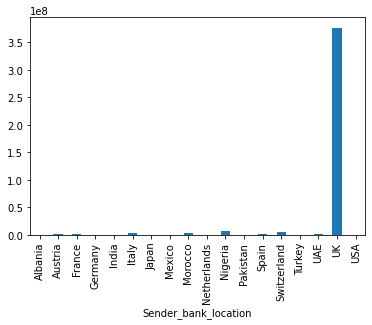

In [43]:
df.query('Is_laundering == 1').groupby(by=['Sender_bank_location'])['Amount'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

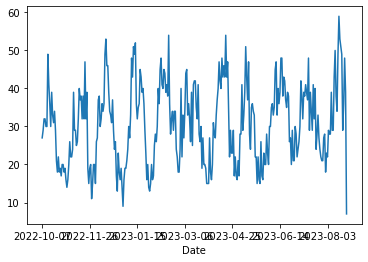

In [65]:
df.query('Is_laundering == 1').groupby(by=['Date']).Amount.count().plot()

In [72]:
df

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out
3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In
4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.250,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.180,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.140,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.700,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In


In [76]:
df.Date

0          2022-10-07
1          2022-10-07
2          2022-10-07
3          2022-10-07
4          2022-10-07
              ...    
9504847    2023-08-23
9504848    2023-08-23
9504849    2023-08-23
9504850    2023-08-23
9504851    2023-08-23
Name: Date, Length: 9504852, dtype: object

In [92]:
len(df)

(9504852, 14)

In [83]:
df = dfAMLRaw.copy()

In [37]:
df['Year-Month'] = df.Date.str.split('-', expand=True)[0] + '-' + df.Date.str.split('-', expand=True)[1]

In [91]:
df.to_csv('df.csv')

<AxesSubplot:xlabel='Year-Month'>

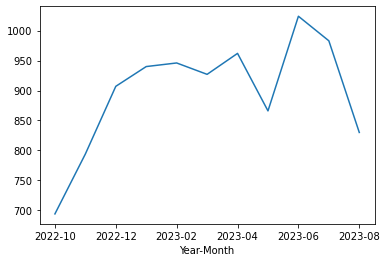

In [89]:
df.query('Is_laundering == 1').groupby(by=['Year-Month'])['Amount'].count().plot()

In [85]:
df

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Month
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,10
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,10
3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10
4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.250,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,08
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.180,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,08
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.140,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,08
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.700,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,08


In [86]:
df.Date.str.split('-', expand=True)

,0,1,2
0,2022,10,07
1,2022,10,07
2,2022,10,07
3,2022,10,07
4,2022,10,07
...,...,...,...
9504847,2023,08,23
9504848,2023,08,23
9504849,2023,08,23
9504850,2023,08,23


In [36]:
df.query('Is_laundering == 1')

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
317,10:46:37,2022-10-07,7401327478,4336451277,2603.300,UK pounds,UK pounds,UK,UK,Cash Deposit,1,Smurfing
1206,11:19:32,2022-10-07,6340007440,4316483340,106.040,UK pounds,Indian rupee,UK,India,Cash Withdrawal,1,Cash_Withdrawal
1649,11:35:42,2022-10-07,3758118046,6081504025,5903.330,UK pounds,Mexican Peso,UK,Mexico,Cross-border,1,Behavioural_Change_2
1954,11:45:53,2022-10-07,445154846,4497771501,3957.870,UK pounds,Naira,UK,Nigeria,Cross-border,1,Structuring
3304,12:39:03,2022-10-07,2758469152,2987279234,7832.410,UK pounds,UK pounds,UK,UK,Debit card,1,Structuring
...,...,...,...,...,...,...,...,...,...,...,...,...
9499725,07:56:34,2023-08-23,6347914836,8661825378,6702.170,UK pounds,US dollar,UK,USA,Cross-border,1,Layered_Fan_In
9501820,09:12:18,2023-08-23,9285879778,7750754,814.490,UK pounds,Euro,UK,Austria,Cross-border,1,Behavioural_Change_1
9501946,09:16:07,2023-08-23,351184098,4257557167,7888.580,UK pounds,Turkish lira,UK,Turkey,Cross-border,1,Behavioural_Change_2
9503705,10:18:07,2023-08-23,7929569569,8236488006,30061.133,UK pounds,UK pounds,UK,UK,Credit card,1,Cycle


In [40]:
df.query('Is_laundering == 1')['Year-Month'].value_counts()

2023-06    1024
2023-07     983
2023-04     962
2023-02     946
2023-01     940
2023-03     927
2022-12     907
2023-05     866
2023-08     830
2022-11     794
2022-10     694
Name: Year-Month, dtype: int64

<AxesSubplot:>

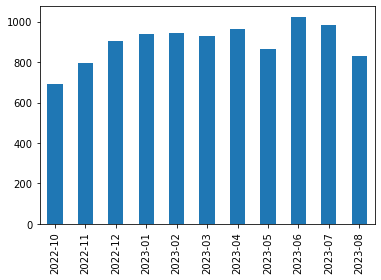

In [41]:
df.query('Is_laundering == 1')['Year-Month'].value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='Date'>

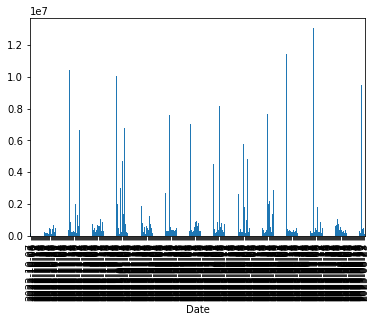

In [31]:
df.query('Is_laundering == 1').groupby(by=['Date']).Amount.sum().plot.bar()

<AxesSubplot:xlabel='Date'>

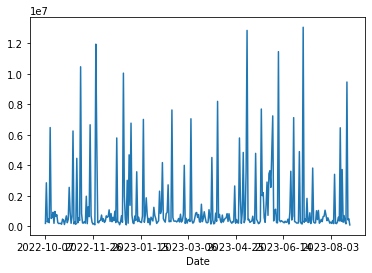

In [66]:
df.query('Is_laundering == 1').groupby(by=['Date']).Amount.sum().plot()

<AxesSubplot:xlabel='Date'>

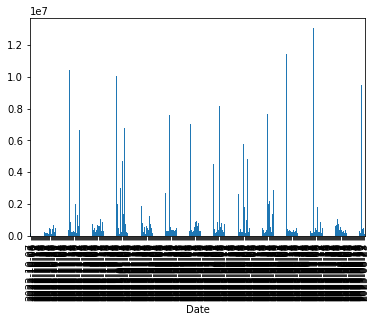

In [30]:
df.query('Is_laundering == 1').groupby(by=['Date']).Amount.sum().plot.bar()

In [101]:
def count_values(column_name):
    return(df.query('Is_laundering == 1')[column_name].value_counts())

In [98]:
dfAMLRaw.dtypes

Time                       object
Date                       object
Sender_account              int64
Receiver_account            int64
Amount                    float64
Payment_currency           object
Received_currency          object
Sender_bank_location       object
Receiver_bank_location     object
Payment_type               object
Is_laundering               int64
Laundering_type            object
dtype: object

In [99]:
df.columns

Index(['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount',
       'Payment_currency', 'Received_currency', 'Sender_bank_location',
       'Receiver_bank_location', 'Payment_type', 'Is_laundering',
       'Laundering_type', 'Month', 'Year-Month'],
      dtype='object')

In [103]:
columns_list = ['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Laundering_type']

for field_name in columns_list:
    print(field_name)
    print(count_values(field_name))
    print()

Payment_currency
UK pounds          8830
Euro                260
Moroccan dirham      90
Dirham               89
Swiss franc          82
Turkish lira         73
Mexican Peso         68
Indian rupee         68
Yen                  65
Albanian lek         64
Pakistani rupee      62
Naira                62
US dollar            60
Name: Payment_currency, dtype: int64

Received_currency
UK pounds          6919
Euro                716
Naira               288
Moroccan dirham     285
Albanian lek        262
Mexican Peso        235
Dirham              225
Turkish lira        218
Pakistani rupee     204
Indian rupee        172
US dollar           118
Yen                 118
Swiss franc         113
Name: Received_currency, dtype: int64

Sender_bank_location
UK             9253
Morocco          55
Italy            45
Mexico           44
Germany          43
India            42
Netherlands      41
Switzerland      41
Japan            38
Austria          38
USA              36
UAE              34
Fra

In [113]:
df.query('Is_laundering').groupby(by='Laundering_type')['Amount'].sum().sort_values(ascending=False)

Laundering_type
Normal_Cash_Deposits   13854598607.850
Normal_Fan_Out            59431905.720
Name: Amount, dtype: float64

In [ ]:
def count_values_by_amount(field_name):
    return( df.query('Is_laundering == 1').groupby(by=[field_name])['Amount'].sum().sort_values(ascending=False))

In [111]:
for field_name in columns_list:
    #print(field_name)
    print(count_values_by_amount(field_name))
    print()

Payment_currency
UK pounds         364180934.803
Moroccan dirham    11673411.910
Swiss franc        11244926.127
Euro                4357265.740
Mexican Peso        3681746.484
Dirham               970311.052
Turkish lira         826011.589
Yen                  719612.006
US dollar            696613.516
Albanian lek         685555.432
Indian rupee         662060.068
Pakistani rupee      598351.701
Naira                425234.929
Name: Amount, dtype: float64

Received_currency
UK pounds         357053916.282
Naira              11868714.666
Euro               11436998.817
Albanian lek        3587249.074
Turkish lira        3311075.385
Moroccan dirham     2623417.869
Pakistani rupee     2409020.833
Dirham              1766710.262
Mexican Peso        1720841.503
Swiss franc         1398634.259
Yen                 1267515.461
Indian rupee        1246800.239
US dollar           1031140.707
Name: Amount, dtype: float64

Sender_bank_location
UK            376477732.332
Nigeria         6654403.

In [ ]:
df.query('Receiver_bank_location')

In [ ]:
df.query('Receiver_bank_location in []')

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Month,Year-Month
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,2022-10
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,10,2022-10
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,10,2022-10
3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,2022-10
4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,2022-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,10:57:01,2023-08-23,2453933570,519744068,2247.250,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,08,2023-08
9504848,10:57:06,2023-08-23,9805510177,5416607878,927.180,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,08,2023-08
9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.140,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,08,2023-08
9504850,10:57:11,2023-08-23,940337377,4812815165,25995.700,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,08,2023-08


In [ ]:
df.query('Is_laundering == 1').Sender_account.value_counts().sort_values(ascending=False) > 

4159678387    37
9710838491    31
4503049074    30
9330449479    29
3990750333    28
              ..
3079818547     1
4852038484     1
2206255345     1
1515428074     1
7929569569     1
Name: Sender_account, Length: 4950, dtype: int64

In [21]:
df.query('Is_laundering == 1').Sender_account.value_counts(ascending=True)[ df.query('Is_laundering == 1').Sender_account.value_counts(ascending=True) > 10]

6901503920    11
8603438385    11
1588352414    11
5233277886    12
5579952282    13
              ..
3990750333    28
9330449479    29
4503049074    30
9710838491    31
4159678387    37
Name: Sender_account, Length: 96, dtype: int64

In [22]:
len(df.query('Is_laundering == 1').Sender_account.value_counts(ascending=True)[ df.query('Is_laundering == 1').Sender_account.value_counts(ascending=True) > 10])

96

In [14]:
len(df.query('Is_laundering == 1').Sender_account.value_counts(ascending=True))

4950

In [28]:
# print(df.query('Is_laundering == 1').Sender_account.value_counts(ascending=True).to_list())

In [18]:
print(len(df.query('Is_laundering == 1').Sender_account.value_counts(ascending=True).to_list()))

4950


In [24]:
df.head(3)

,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type
0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits
1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out
2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out


## Network analysis

#### Receiver_bank_location and Laundering_type

In [48]:
df = pd.read_csv('df.csv')
df

,Unnamed: 0,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Month,Year-Month
0,0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,2022-10
1,1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,10,2022-10
2,2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,10,2022-10
3,3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,2022-10
4,4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,2022-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9504847,10:57:01,2023-08-23,2453933570,519744068,2247.250,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,8,2023-08
9504848,9504848,10:57:06,2023-08-23,9805510177,5416607878,927.180,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,8,2023-08
9504849,9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.140,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,8,2023-08
9504850,9504850,10:57:11,2023-08-23,940337377,4812815165,25995.700,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,8,2023-08


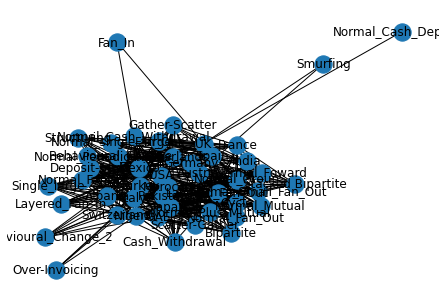

<Figure size 1080x1080 with 0 Axes>

In [54]:
G = nx.from_pandas_edgelist(df, "Receiver_bank_location", "Laundering_type")
nx.draw(G, with_labels = True)
plt.figure(figsize=(15,15))
plt.show()

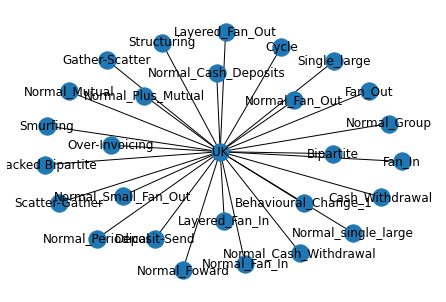

In [ ]:

G = nx.from_pandas_edgelist(df.query('Receiver_bank_location == "UK" '), "Receiver_bank_location", "Laundering_type", "Amount")
nx.draw(G, with_labels = True)
plt.show()


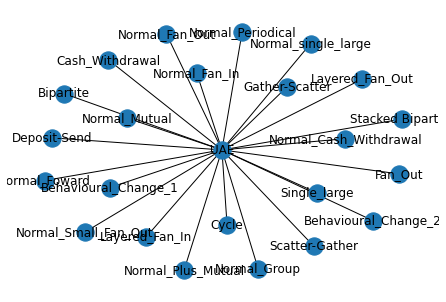

In [58]:
G = nx.from_pandas_edgelist(df.query('Receiver_bank_location == "UAE" '), "Receiver_bank_location", "Laundering_type", "Amount")
nx.draw(G, with_labels = True)
plt.show()

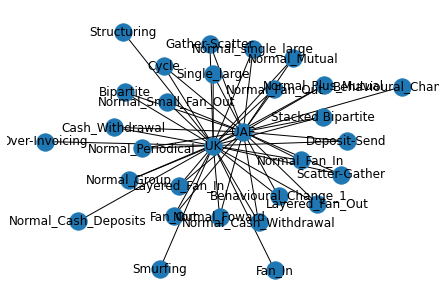

In [57]:
G = nx.from_pandas_edgelist(df.query('Receiver_bank_location in ["UK", "UAE"] '), "Receiver_bank_location", "Laundering_type", "Amount")
nx.draw(G, with_labels = True)
plt.show()

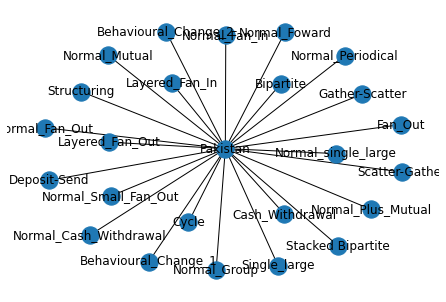

In [59]:
G = nx.from_pandas_edgelist(df.query('Receiver_bank_location == "Pakistan" '), "Receiver_bank_location", "Laundering_type", "Amount")
nx.draw(G, with_labels = True)
plt.show()

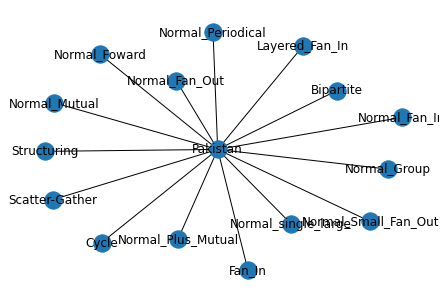

In [60]:
G = nx.from_pandas_edgelist(df.query('Sender_bank_location == "Pakistan" '), "Sender_bank_location", "Laundering_type", "Amount")
nx.draw(G, with_labels = True)
plt.show()

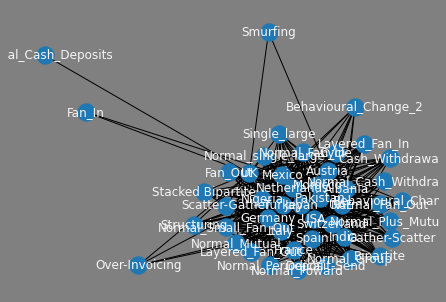

In [26]:
G = nx.from_pandas_edgelist(df, "Receiver_bank_location", "Laundering_type")
fig = plt.figure()
nx.draw(G, with_labels = True, font_color="whitesmoke")
fig.set_facecolor('gray')
plt.show()

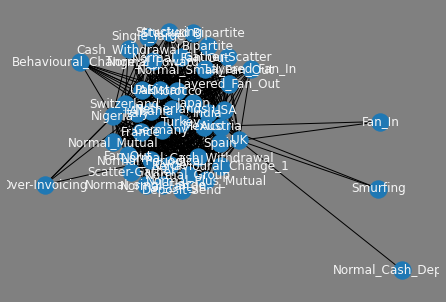

In [27]:
G = nx.from_pandas_edgelist(df, "Laundering_type", "Receiver_bank_location")
fig = plt.figure()
nx.draw(G, with_labels = True, font_color="whitesmoke")
fig.set_facecolor('gray')
plt.show()

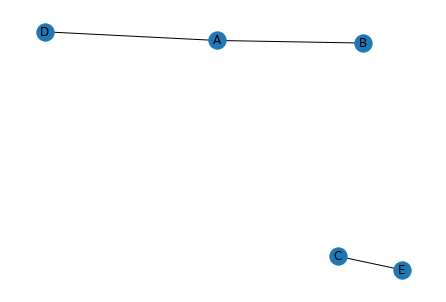

In [43]:
import pandas as pd
pd.options.display.max_columns = 20
import numpy as np

rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3, 2))

a = ["A", "B", "C"]
b = ["D", "A", "E"]

df = pd.DataFrame(ints, columns=["weight", "cost"])
df[0] = a
df["b"] = b
df[["weight", "cost", 0, "b"]]

G = nx.from_pandas_edgelist(df, 0, "b", ["weight", "cost"])

nx.draw(G, with_labels = True)
plt.show()

In [44]:
G["E"]["C"]["weight"]

10

In [45]:
G["E"]["C"]["cost"]

9

In [46]:
edges = pd.DataFrame(
    {
        "source": [0, 1, 2],
        "target": [2, 2, 3],
        "weight": [3, 4, 5],
        "color": ["red", "blue", "blue"],
    }
)
G = nx.from_pandas_edgelist(edges, edge_attr=True)
G[0][2]["color"]

'red'

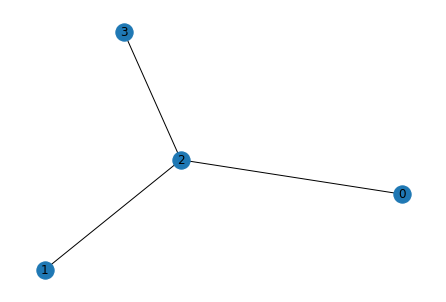

In [47]:
nx.draw(G, with_labels = True)
plt.show()

In [62]:
df.isnull()

,Unnamed: 0,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Month,Year-Month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9504848,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9504849,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9504850,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
df.isnull().sum()

Unnamed: 0                0
Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
Laundering_type           0
Month                     0
Year-Month                0
dtype: int64

In [ ]:
df3 = df.copy().dropna()
df3.shape

In [ ]:
 df3.drop_duplicates()

In [ ]:
df.mean()

In [ ]:
df['Receiver_bank_location'].value_counts(normalize=True)

In [ ]:
df[['Date', 'Amount']].plot.line()

In [ ]:
df['Outcome'].value_counts().sort_index().plot.bar()

(array([9.5048e+06, 1.1000e+01, 1.2000e+01, 1.0000e+01, 5.0000e+00,
        6.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([3.73000000e+00, 1.26185320e+06, 2.52370266e+06, 3.78555213e+06,
        5.04740160e+06, 6.30925107e+06, 7.57110053e+06, 8.83295000e+06,
        1.00947995e+07, 1.13566489e+07, 1.26184984e+07]),
 <BarContainer object of 10 artists>)

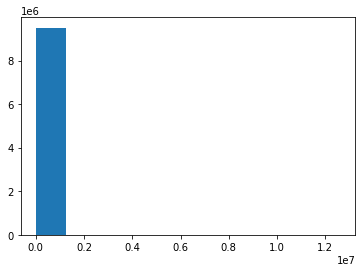

In [5]:
plt.hist(df.Amount)

In [6]:
df.Receiver_bank_location.value_counts()

UK             8864634
Pakistan         38980
Austria          38844
Albania          38783
Japan            38729
Morocco          38704
Germany          38540
France           38512
Mexico           38385
Nigeria          38272
Netherlands      37314
Spain            37288
India            36936
USA              36850
Italy            36517
Switzerland      36081
UAE              35897
Turkey           35586
Name: Receiver_bank_location, dtype: int64

In [7]:
pd.to_datetime(df.Date)

0         2022-10-07
1         2022-10-07
2         2022-10-07
3         2022-10-07
4         2022-10-07
             ...    
9504847   2023-08-23
9504848   2023-08-23
9504849   2023-08-23
9504850   2023-08-23
9504851   2023-08-23
Name: Date, Length: 9504852, dtype: datetime64[ns]

In [ ]:
df.dropna()

In [8]:
df.corr()

,Unnamed: 0,Sender_account,Receiver_account,Amount,Is_laundering,Month
Unnamed: 0,1.000,-0.001,-0.002,-0.001,0.002,-0.283
Sender_account,-0.001,1.000,0.001,-0.000,0.002,0.001
Receiver_account,-0.002,0.001,1.000,0.000,-0.000,-0.000
Amount,-0.001,-0.000,0.000,1.000,0.040,-0.001
Is_laundering,0.002,0.002,-0.000,0.040,1.000,-0.001
Month,-0.283,0.001,-0.000,-0.001,-0.001,1.000


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
# Remove rows with a NULL value in the "Date" column:

df.dropna(subset=['Date'], inplace = True)

In [ ]:
df.fillna(5)

In [ ]:
new_df = pd.get_dummies(df.Name)

In [22]:
df

,Unnamed: 0,Time,Date,Sender_account,Receiver_account,Amount,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Month,Year-Month
0,0,10:35:19,2022-10-07,8724731955,2769355426,1459.150,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,2022-10
1,1,10:35:20,2022-10-07,1491989064,8401255335,6019.640,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,10,2022-10
2,2,10:35:20,2022-10-07,287305149,4404767002,14328.440,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,10,2022-10
3,3,10:35:21,2022-10-07,5376652437,9600420220,11895.000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,10,2022-10
4,4,10:35:21,2022-10-07,9614186178,3803336972,115.250,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,10,2022-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504847,9504847,10:57:01,2023-08-23,2453933570,519744068,2247.250,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,8,2023-08
9504848,9504848,10:57:06,2023-08-23,9805510177,5416607878,927.180,UK pounds,UK pounds,UK,UK,Debit card,0,Normal_Small_Fan_Out,8,2023-08
9504849,9504849,10:57:06,2023-08-23,7282330957,2995527149,1455.140,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Small_Fan_Out,8,2023-08
9504850,9504850,10:57:11,2023-08-23,940337377,4812815165,25995.700,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,8,2023-08


## Machine Learning Data Processing

Steps:
1. EDA
1.1. Look at all variables
1.2. What variables are categorical?
1.3. What variables are numerical?
1.4. Is there missing data in categorical or numerical data?

2. Data Processing
2.0. Split the data into train and test sets.
2.1. Fill numerical missing data with the mean.
2.2. Fill categorical missing data with the mode.
2.3. Perform feature scaling for numerical data.
2.4. Encode categorical data into OneHotEncode.

3. Feature Engineering (Skip for now)

4. Fit the Model

5. Evaluate the Model


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Time                    object 
 2   Date                    object 
 3   Sender_account          int64  
 4   Receiver_account        int64  
 5   Amount                  float64
 6   Payment_currency        object 
 7   Received_currency       object 
 8   Sender_bank_location    object 
 9   Receiver_bank_location  object 
 10  Payment_type            object 
 11  Is_laundering           int64  
 12  Laundering_type         object 
 13  Month                   int64  
 14  Year-Month              object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.1+ GB


## Basics of Python 

In [38]:


dict_new = dict(key1='value1', key2='value2')

In [39]:
dict_new

{'key1': 'value1', 'key2': 'value2'}

In [40]:
for i, z in dict_new.items():
    print(i, z)

key1 value1
key2 value2


In [41]:
dict_new.items()

dict_items([('key1', 'value1'), ('key2', 'value2')])

In [42]:
for i in dict_new:
    print(i)

key1
key2


In [49]:
dict_new.keys()

dict_keys(['key1', 'key2'])

In [47]:
list(dict_new.values())

['value1', 'value2']

In [52]:
df1 = df.copy()

In [55]:
df1.query('Sender_bank_location == "UK"')['Sender_bank_location'] = 'United Kingdom'

C:\Users\Cube Statistica\AppData\Local\Temp\ipykernel_28492\1440978327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.query('Sender_bank_location == "UK"')['Sender_bank_location'] = 'United Kingdom'


In [57]:
df1.loc[df1['Sender_bank_location'] == "UK", 'Sender_bank_location'] = 'United Kingdom'

In [59]:
df1['Sender_bank_location']

0          United Kingdom
1          United Kingdom
2          United Kingdom
3          United Kingdom
4          United Kingdom
                ...      
9504847    United Kingdom
9504848    United Kingdom
9504849    United Kingdom
9504850    United Kingdom
9504851    United Kingdom
Name: Sender_bank_location, Length: 9504852, dtype: object